In [1]:
# Stop warnings
import warnings
warnings.filterwarnings("ignore")

# General imports
import cortex
import importlib
import ipdb
import json
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
import pandas as pd
sys.path.append("{}/../../../../utils".format(os.getcwd()))
from surface_utils import load_surface ,make_surface_image
from pycortex_utils import set_pycortex_config_file, get_roi_verts_hemi

In [2]:
main_dir = '/Users/uriel/disks/meso_shared'
project_dir = 'RetinoMaps'
pycortex_subject = 'sub-170k'
subject = 'sub-08' 
format_ = '170k'
# load data
subject = 'sub-170k'
rois = ['V1']
input_fn = '/Users/uriel/disks/meso_shared/RetinoMaps/derivatives/pp_data/sub-08/170k/prf/prf_derivatives/sub-08_task-pRF_fmriprep_dct_avg_prf-deriv_gauss_gridfit.dtseries.nii'
# input_fn = '/Users/uriel/disks/meso_shared/RetinoMaps/derivatives/pp_data/sub-08/fsnative/prf/prf_derivatives/sub-08_task-pRF_hemi-R_fmriprep_dct_avg_prf-deriv_gauss_gridfit.func.gii'
# img, data, data_roi, roi_idx = get_roi_verts_hemi(fn=input_fn,subject=subject,rois=rois)

In [3]:
# Set pycortex db and colormaps
cortex_dir = "{}/{}/derivatives/pp_data/cortex".format(main_dir, project_dir)
set_pycortex_config_file(cortex_dir)
importlib.reload(cortex)
 
roi_verts = cortex.get_roi_verts(subject=subject, 
                                 roi= rois, 
                                 mask=True
                                )

In [6]:
V1_data = roi_verts['V1'].astype(int)


Fontconfig warning: ignoring UTF-8: not a valid region tag


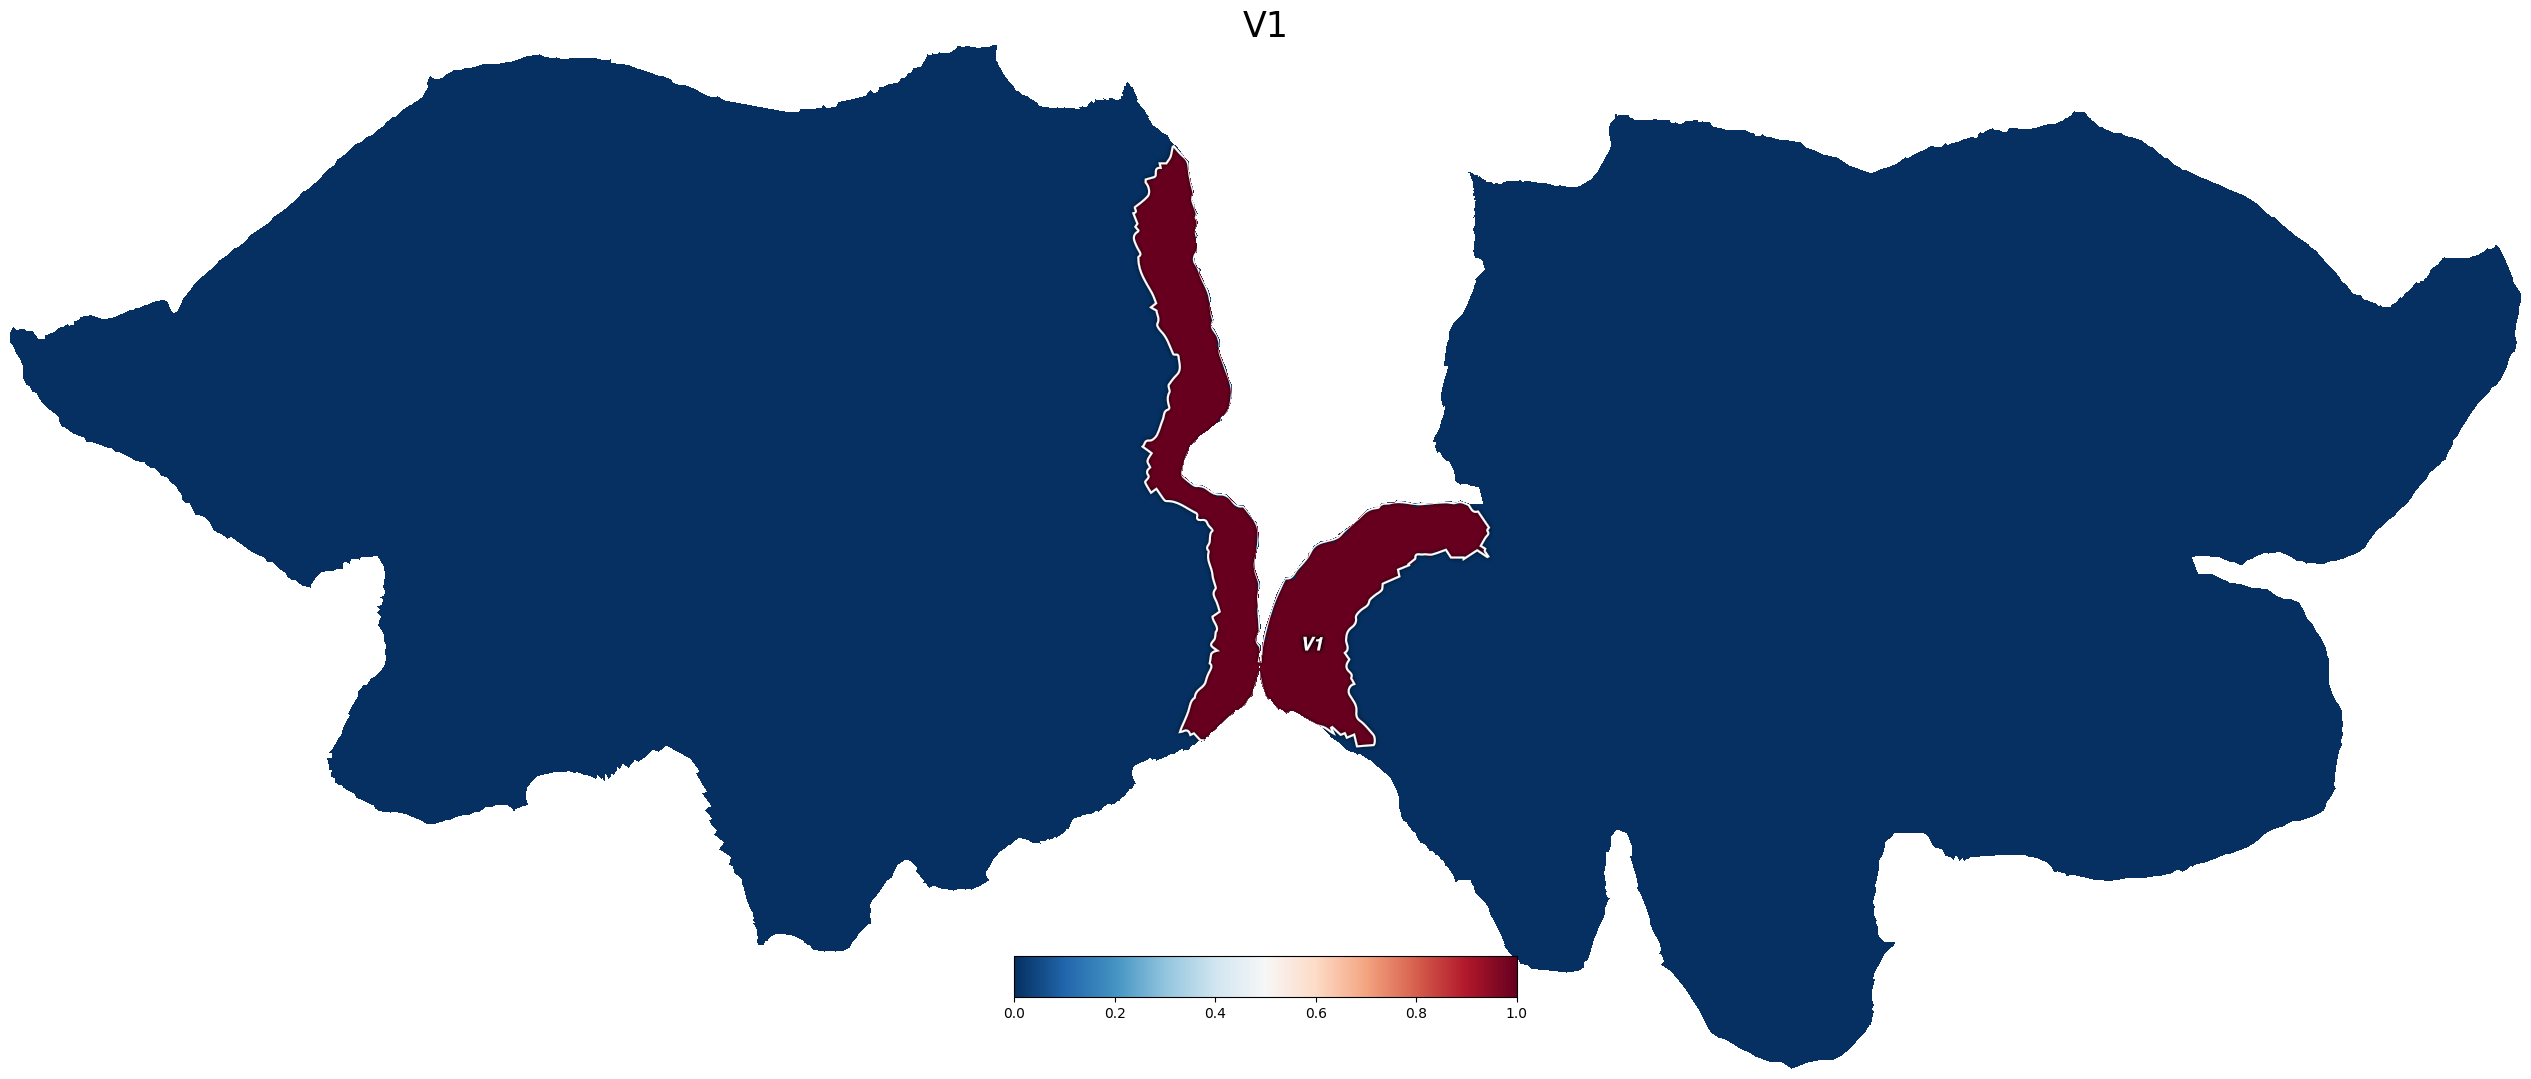

In [7]:
# creat the z-score flatmap with the threshold
vertex_data = cortex.Vertex(V1_data, pycortex_subject)

cortex.quickshow(vertex_data)
plt.title("V1",fontsize=25)
plt.savefig('/Users/uriel/Downloads/V1.pdf')
plt.show()


In [4]:

# # Stop warnings
# import warnings
# warnings.filterwarnings("ignore")

# # General imports
# import cortex
# import importlib
# import ipdb
# import json
# import matplotlib.pyplot as plt
# import numpy as np
# import os
# import sys
# sys.path.append("{}/../../../utils".format(os.getcwd()))
# from pycortex_utils import draw_cortex, set_pycortex_config_file,load_surface_pycortex

# deb = ipdb.set_trace

# #Define analysis parameters
# with open('../../../../settings.json') as f:
#     json_s = f.read()
#     analysis_info = json.loads(json_s)
# formats = analysis_info['formats']
# extensions = analysis_info['extensions']

# # Inputs
# # main_dir = sys.argv[1]
# # project_dir = sys.argv[2]
# # subject = sys.argv[3]
# # save_svg_in = sys.argv[4]



# # Maps settings
# rsq_idx, ecc_idx, polar_real_idx, polar_imag_idx , size_idx, \
#     amp_idx, baseline_idx, x_idx, y_idx = 0,1,2,3,4,5,6,7,8
      
# cmap_polar, cmap_uni, cmap_ecc_size = 'hsv', 'Reds', 'Spectral'
# col_offset = 1.0/14.0
# cmap_steps = 255

# description_end = 'avg gridfit'
# deriv_fn_label = 'avg-gridfit'

# # plot scales
# rsq_scale = [0, 1]
# ecc_scale = [0, 7.5]
# size_scale = [0, 7.5]

# # Set pycortex db and colormaps
# cortex_dir = "{}/{}/derivatives/pp_data/cortex".format(main_dir, project_dir)
# set_pycortex_config_file(cortex_dir)
# importlib.reload(cortex)
 

# # Define directories and fn
# prf_dir = "{}/{}/derivatives/pp_data/{}/{}/prf".format(main_dir, project_dir, subject,format_)
# fit_dir = "{}/fit".format(prf_dir)
# prf_deriv_dir = "{}/prf_derivatives".format(prf_dir)
# flatmaps_dir = '{}/pycortex/flatmaps_avg_gauss_gridfit'.format(prf_dir)
# datasets_dir = '{}/pycortex/datasets_avg_gauss_gridfit'.format(prf_dir)




# deriv_avg_fn = '{}/{}_task-pRF_fmriprep_dct_avg_prf-deriv_gauss_gridfit.dtseries.nii'.format(prf_deriv_dir, subject)
# deriv_mat = load_surface_pycortex(brain_fn=deriv_avg_fn)
# save_svg = False

# print('Creating flatmaps...')

# maps_names = []

# # threshold data
# deriv_mat_th = deriv_mat
# amp_down =  deriv_mat_th[amp_idx,...] > 0
# rsqr_th_down = deriv_mat_th[rsq_idx,...] >= analysis_info['rsqr_th'][0]
# rsqr_th_up = deriv_mat_th[rsq_idx,...] <= analysis_info['rsqr_th'][1]
# size_th_down = deriv_mat_th[size_idx,...] >= analysis_info['size_th'][0]
# size_th_up = deriv_mat_th[size_idx,...] <= analysis_info['size_th'][1]
# ecc_th_down = deriv_mat_th[ecc_idx,...] >= analysis_info['ecc_th'][0]
# ecc_th_up = deriv_mat_th[ecc_idx,...] <= analysis_info['ecc_th'][1]
# all_th = np.array((amp_down,rsqr_th_down,rsqr_th_up,size_th_down,size_th_up,ecc_th_down,ecc_th_up)) 
# deriv_mat[rsq_idx,np.logical_and.reduce(all_th)==False]=0

# # r-square
# rsq_data = deriv_mat[rsq_idx,...]
# alpha_range = analysis_info["alpha_range"]
# alpha = (rsq_data - alpha_range[0])/(alpha_range[1]-alpha_range[0])
# alpha[alpha>1]=1
# param_rsq = {'data': rsq_data, 'cmap': cmap_uni, 'alpha': rsq_data, 
#              'vmin': rsq_scale[0], 'vmax': rsq_scale[1], 'cbar': 'discrete', 
#              'cortex_type': 'VertexRGB','description': 'pRF rsquare',
#              'curv_brightness': 1, 'curv_contrast': 0.1, 'add_roi': save_svg,
#              'cbar_label': 'pRF R2', 'with_labels': True}
# maps_names.append('rsq')

# # polar angle
# pol_comp_num = deriv_mat[polar_real_idx,...] + 1j * deriv_mat[polar_imag_idx,...]
# polar_ang = np.angle(pol_comp_num)
# ang_norm = (polar_ang + np.pi) / (np.pi * 2.0)
# ang_norm = np.fmod(ang_norm + col_offset,1)
# param_polar = {'data': ang_norm, 'cmap': cmap_polar, 'alpha': alpha, 
#                'vmin': 0, 'vmax': 1, 'cmap_steps': cmap_steps, 'cortex_type': 'VertexRGB',
#                'cbar': 'polar', 'col_offset': col_offset, 
#                'description': 'pRF polar:{:3.0f} steps{}'.format(cmap_steps, description_end), 
#                'curv_brightness': 0.1, 'curv_contrast': 0.25, 'add_roi': save_svg, 
#                'with_labels': True}
# exec('param_polar_{cmap_steps} = param_polar'.format(cmap_steps = int(cmap_steps)))
# exec('maps_names.append("polar_{cmap_steps}")'.format(cmap_steps = int(cmap_steps)))

# # eccentricity
# ecc_data = deriv_mat[ecc_idx,...]
# param_ecc = {'data': ecc_data, 'cmap': cmap_ecc_size, 'alpha': alpha,
#              'vmin': ecc_scale[0], 'vmax': ecc_scale[1], 'cbar': 'ecc', 'cortex_type': 'VertexRGB',
#              'description': 'pRF eccentricity{}'.format(description_end), 'curv_brightness': 1,
#              'curv_contrast': 0.1, 'add_roi': save_svg, 'with_labels': True}

# maps_names.append('ecc')

# # size
# size_data = deriv_mat[size_idx,...]
# param_size = {'data': size_data, 'cmap': cmap_ecc_size, 'alpha': alpha, 
#               'vmin': size_scale[0], 'vmax': size_scale[1], 'cbar': 'discrete', 
#               'cortex_type': 'VertexRGB', 'description': 'pRF size{}'.format(description_end), 
#               'curv_brightness': 1, 'curv_contrast': 0.1, 'add_roi': False, 'cbar_label': 'pRF size',
#               'with_labels': True}
# maps_names.append('size')

# # V1

# param_v1 = {'data': V1_data, 'cmap': cmap_ecc_size,  
#               'vmin': 0, 'vmax': 1, 'cbar': 'discrete', 
#               'cortex_type': 'VertexRGB', 'description': 'pRF size{}'.format(description_end), 
#               'curv_brightness': 1, 'curv_contrast': 0.1, 'add_roi': False, 'cbar_label': 'pRF size',
#               'with_labels': True}
# maps_names.append('v1')

# # draw flatmaps
# volumes = {}
# for maps_name in maps_names:

#     # create flatmap
#     roi_name = 'pRF_{}'.format(maps_name)
#     roi_param = {'subject': pycortex_subject, 'xfmname': None, 'roi_name': roi_name}
#     print(roi_name)
#     exec('param_{}.update(roi_param)'.format(maps_name))
#     exec('volume_{maps_name} = draw_cortex(**param_{maps_name})'.format(maps_name = maps_name))

    

    


In [50]:
mmp_atlas_fn ='/Users/uriel/disks/meso_shared/RetinoMaps/derivatives/pp_data/cortex/db/sub-170k/surface-info/mmp_atlas.npz'
atlas_label_fn = '/Users/uriel/disks/meso_shared/RetinoMaps/derivatives/pp_data/cortex/db/sub-170k/surface-info/atlas_label.npz'
parcelation_fn = '/Users/uriel/disks/meso_shared/RetinoMaps/derivatives/pp_data/cortex/db/sub-170k/surface-info/parcellation.npz'
mmp_csv = pd.read_csv('/Users/uriel/Downloads/HCP-MMP1_UniqueRegionList.csv')
mmp_txt = pd.read_table('/Users/uriel/Downloads/HCPMMP1_on_MNI152_ICBM2009a_nlin.txt',sep= ' ')

In [51]:
mmp_npz = np.load(mmp_atlas_fn )
atlas_label = np.load(atlas_label_fn)
parcelation = np.load(parcelation_fn)

In [107]:
len(np.unique(mmp_npz['left']))

180

In [106]:
np.unique(mmp_npz['right'])

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179], d

In [10]:
mmp_npz_brain = np.concatenate([mmp_npz['left'],mmp_npz['right']]) 

Fontconfig warning: ignoring UTF-8: not a valid region tag


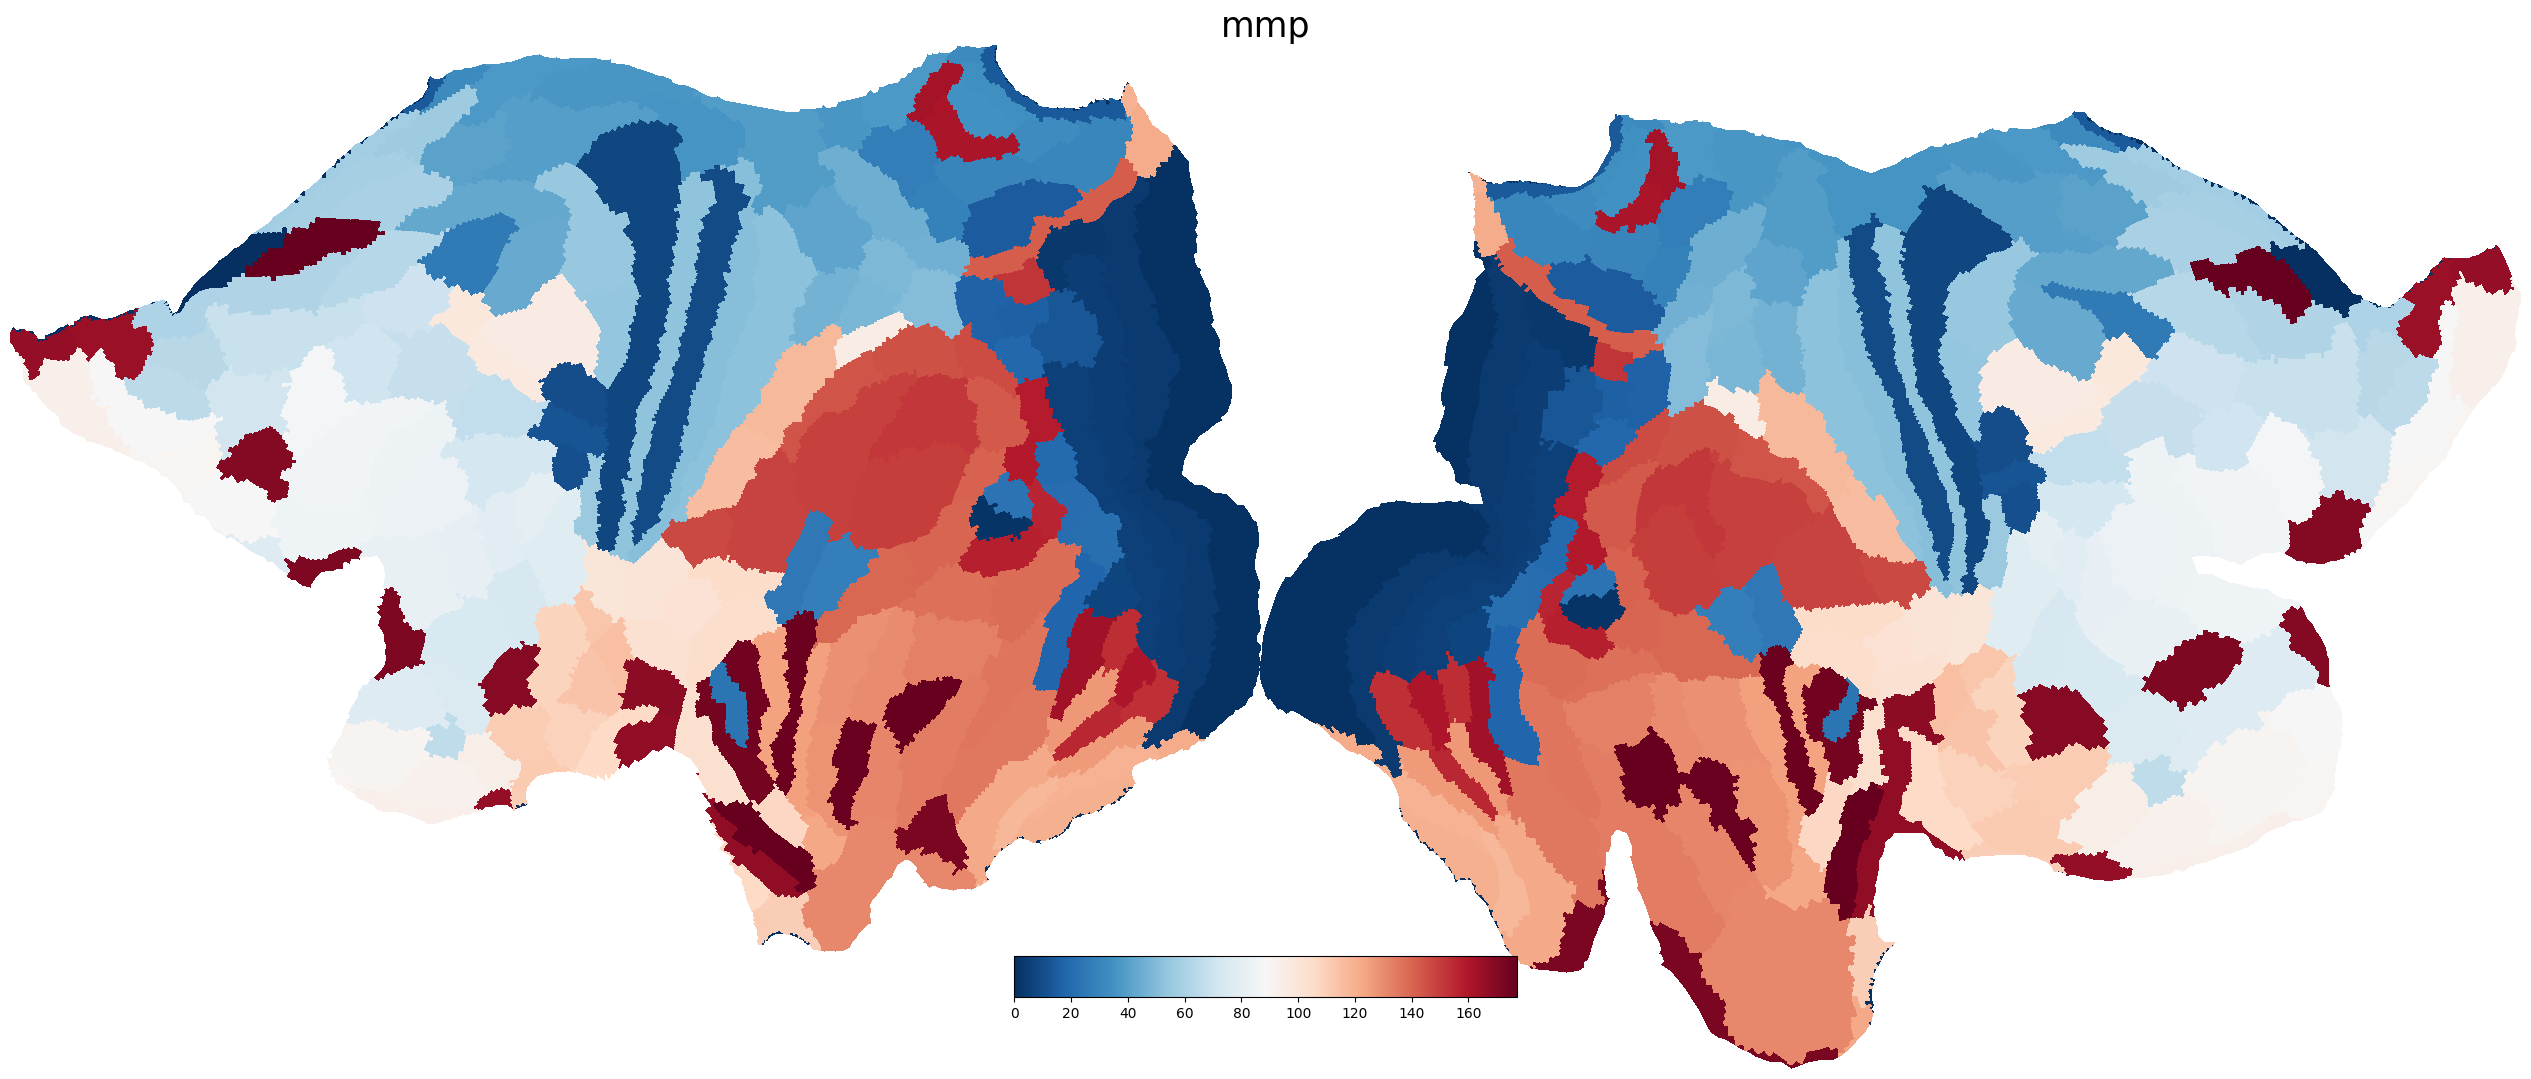

In [112]:
# plot mmp npz
vertex_data = cortex.Vertex(mmp_npz_brain, pycortex_subject)

cortex.quickshow(vertex_data)
plt.title("mmp",fontsize=25)
plt.savefig('/Users/uriel/Downloads/V1.pdf')
plt.show()

In [113]:
#  make left hemi 
mmp_df_lh = pd.DataFrame(mmp_npz['left'])
mmp_df_lh.columns = ['roi_id']
mmp_df_lh = mmp_df_lh.assign(hemi='L')
mmp_df_rh.roi_id = mmp_df_rh.roi_id 

#  make left hemi 
mmp_df_rh = pd.DataFrame(mmp_npz['right'])
mmp_df_rh.columns = ['roi_id']
mmp_df_rh = mmp_df_rh.assign(hemi='R')
mmp_df_rh.roi_id = mmp_df_rh.roi_id + 180

#  make brain df
mmp_df_brain = pd.concat([mmp_df_lh,mmp_df_rh],ignore_index=True )
mmp_df_brain = mmp_df_brain.assign(roi_name=np.nan)

In [110]:
roi_id_array = np.array(mmp_df_brain.roi_id)

Fontconfig warning: ignoring UTF-8: not a valid region tag


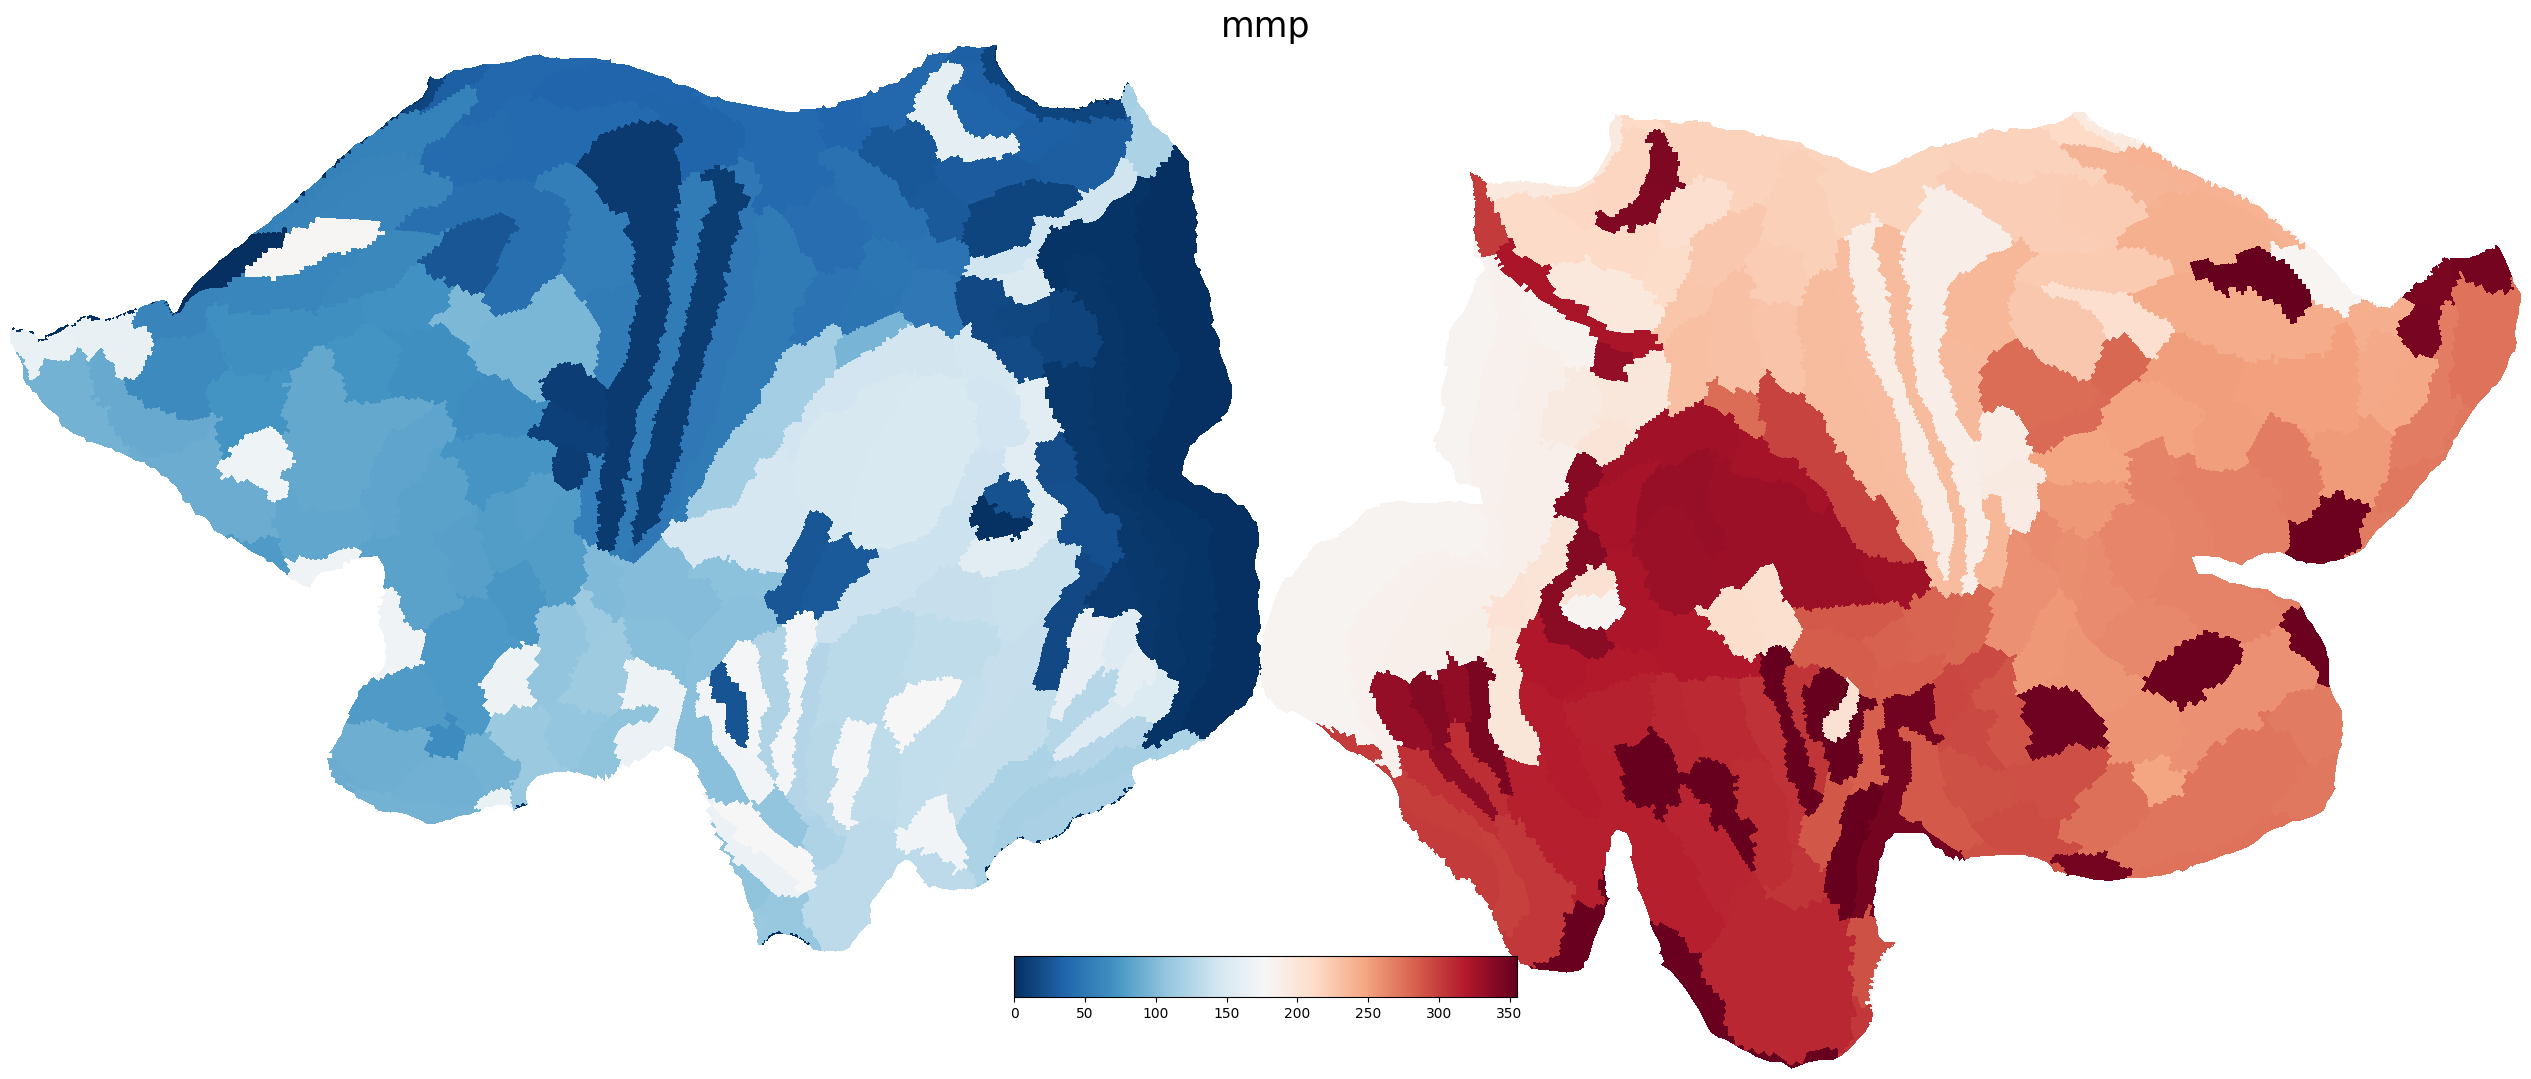

In [111]:
# plot mmp npz
vertex_data = cortex.Vertex(roi_id_array, pycortex_subject)

cortex.quickshow(vertex_data)
plt.title("mmp",fontsize=25)
# plt.savefig('/Users/uriel/Downloads/V1.pdf')
plt.show()

In [15]:
# verification
# np.unique(mmp_df_lh.roi_id)
# np.unique(mmp_df_rh.roi_id)

In [115]:
# correct to have id between 0 and 359 and not between 1 and 360
if not (mmp_csv.regionID == 0).any():
    mmp_csv.regionID = mmp_csv.regionID - 1

mmp_csv['index_col'] = mmp_csv.index

In [64]:
mmp_csv.iloc[34]

regionName                     31pv_L
regionLongName     Area_31p_ventral_L
regionIdLabel                    35_L
LR                                  L
region                           31pv
Lobe                              Par
cortex            Posterior_Cingulate
regionID                           35
Cortex_ID                          18
x-cog                      100.042751
y-cog                       81.552045
z-cog                      104.622677
volmm                             538
Name: 34, dtype: object

In [116]:
mmp_csv.loc[(mmp_csv['region'] == 'V1') ]

,regionName,regionLongName,regionIdLabel,LR,region,Lobe,cortex,regionID,Cortex_ID,x-cog,y-cog,z-cog,volmm,index_col
0,V1_L,Primary_Visual_Cortex_L,1_L,L,V1,Occ,Primary_Visual,0,1,100.491589,41.138901,71.637040,6717,0
180,V1_R,Primary_Visual_Cortex_R,201_R,R,V1,Occ,Primary_Visual,200,1,78.060375,44.539286,74.333474,7089,180


In [71]:
mmp_csv

,regionName,regionLongName,regionIdLabel,LR,region,Lobe,cortex,regionID,Cortex_ID,x-cog,y-cog,z-cog,volmm
0,V1_L,Primary_Visual_Cortex_L,1_L,L,V1,Occ,Primary_Visual,1,1,100.491589,41.138901,71.637040,6717
1,MST_L,Medial_Superior_Temporal_Area_L,2_L,L,MST,Occ,MT+_Complex_and_Neighboring_Visual_Areas,2,5,132.416667,58.901786,82.059524,336
2,V6_L,Sixth_Visual_Area_L,3_L,L,V6,Occ,Dorsal_Stream_Visual,3,3,104.543112,44.481665,103.916749,1009
3,V2_L,Second_Visual_Area_L,4_L,L,V2,Occ,Early_Visual,4,2,102.236656,44.064791,74.401125,6220
4,V3_L,Third_Visual_Area_L,5_L,L,V3,Occ,Early_Visual,5,2,107.926111,40.632159,76.961153,4994
...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,STSva_R,Area_STSv_anterior_R,376_R,R,STSva,Temp,Auditory_Association,376,11,32.924419,117.527907,54.337791,1720
356,TE1m_R,Area_TE1_Middle_R,377_R,R,TE1m,Temp,Lateral_Temporal,377,14,26.146605,102.236497,53.246528,2592
357,PI_R,Para-Insular_Area_R,378_R,R,PI,Temp,Insular_and_Frontal_Opercular,378,12,47.013363,123.157016,57.926503,898
358,a32pr_R,Area_anterior_32_prime_R,379_R,R,a32pr,Fr,Anterior_Cingulate_and_Medial_Prefrontal,379,19,81.723096,153.990326,102.516324,827


In [19]:
mmp_csv.iloc[181]

regionName                                           MST_R
regionLongName             Medial_Superior_Temporal_Area_R
regionIdLabel                                        202_R
LR                                                       R
region                                                 MST
Lobe                                                   Occ
cortex            MT+_Complex_and_Neighboring_Visual_Areas
regionID                                               201
Cortex_ID                                                5
x-cog                                            43.620295
y-cog                                            63.751227
z-cog                                            78.013093
volmm                                                  611
index_col                                              181
Name: 181, dtype: object

In [117]:
# make the final df
mmp_final_df = pd.merge(mmp_df_brain, mmp_csv, left_on='roi_id', right_on='index_col', how='left')
mmp_final_df = mmp_final_df[['roi_id', 'region','hemi']]
mmp_final_df.rename(columns={'region': 'roi_name'}, inplace=True)



In [63]:
mmp_final_df

,roi_id,roi_name,hemi
0,34,31pv,L
1,52,3a,L
2,12,V3A,L
3,26,PCV,L
4,13,RSC,L
...,...,...,...
118579,313,TE2a,R
118580,313,TE2a,R
118581,313,TE2a,R
118582,313,TE2a,R


In [22]:
mmp_final_df.loc[(mmp_final_df['roi_name'] == 'V1') ]

,roi_id,roi_name,hemi
7,0,V1,L
24,0,V1,L
25,0,V1,L
26,0,V1,L
27,0,V1,L
...,...,...,...
111892,180,V1,R
111893,180,V1,R
111936,180,V1,R
111937,180,V1,R


In [23]:
mmp_df_brain.roi_id == mmp_final_df.roi_id 

0         True
1         True
2         True
3         True
4         True
          ... 
118579    True
118580    True
118581    True
118582    True
118583    True
Name: roi_id, Length: 118584, dtype: bool

In [24]:
mmp_final_df

,roi_id,roi_name,hemi
0,34,31pv,L
1,52,3a,L
2,12,V3A,L
3,26,PCV,L
4,13,RSC,L
...,...,...,...
118579,313,TE2a,R
118580,313,TE2a,R
118581,313,TE2a,R
118582,313,TE2a,R


In [118]:
V1 = np.zeros(len(mmp_final_df))

# Mettre à jour les valeurs correspondantes à 1 où roi_name est égal à 'V1'
V1[mmp_final_df['roi_name'] == 'V1'] = 1

In [42]:
np.where(V1_data==1)

(array([   135,    137,    138, ..., 106214, 106215, 106216]),)

In [1]:
V1_b = np.zeros(len(mmp_df_brain))

# Mettre à jour les valeurs correspondantes à 1 où roi_name est égal à 'V1'
V1_b[mmp_df_brain['roi_id'] == 180] = 1

NameError: name 'np' is not defined

In [27]:
V1_b == V1

array([ True,  True,  True, ...,  True,  True,  True])

Fontconfig warning: ignoring UTF-8: not a valid region tag


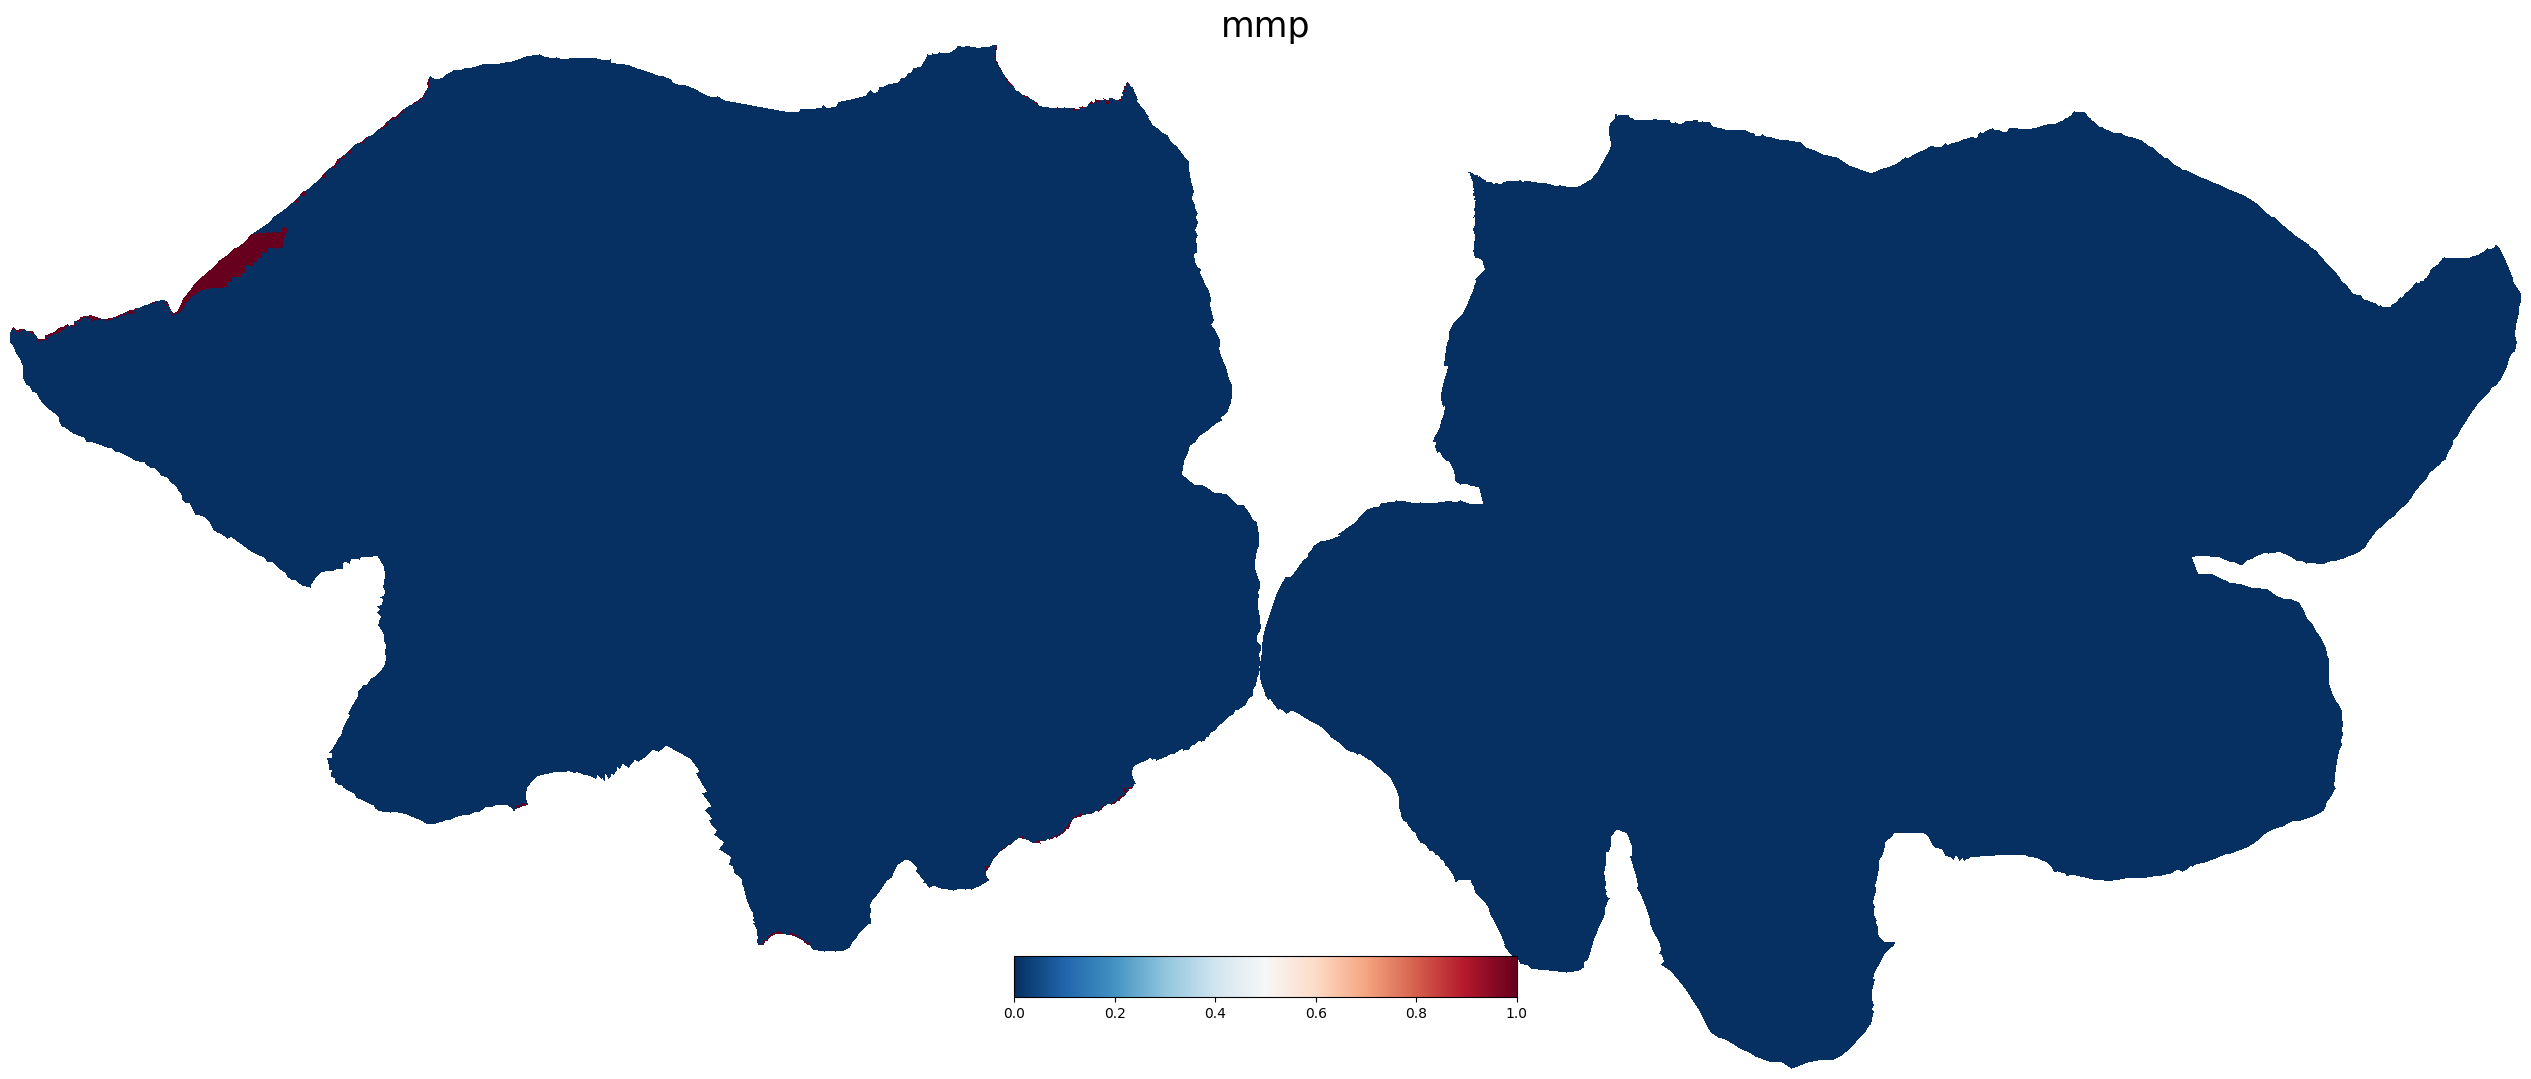

In [119]:
# plot mmp npz
vertex_data = cortex.Vertex(V1, pycortex_subject)

cortex.quickshow(vertex_data)
plt.title("mmp",fontsize=25)
# plt.savefig('/Users/uriel/Downloads/V1.pdf')
plt.show()

Fontconfig warning: ignoring UTF-8: not a valid region tag


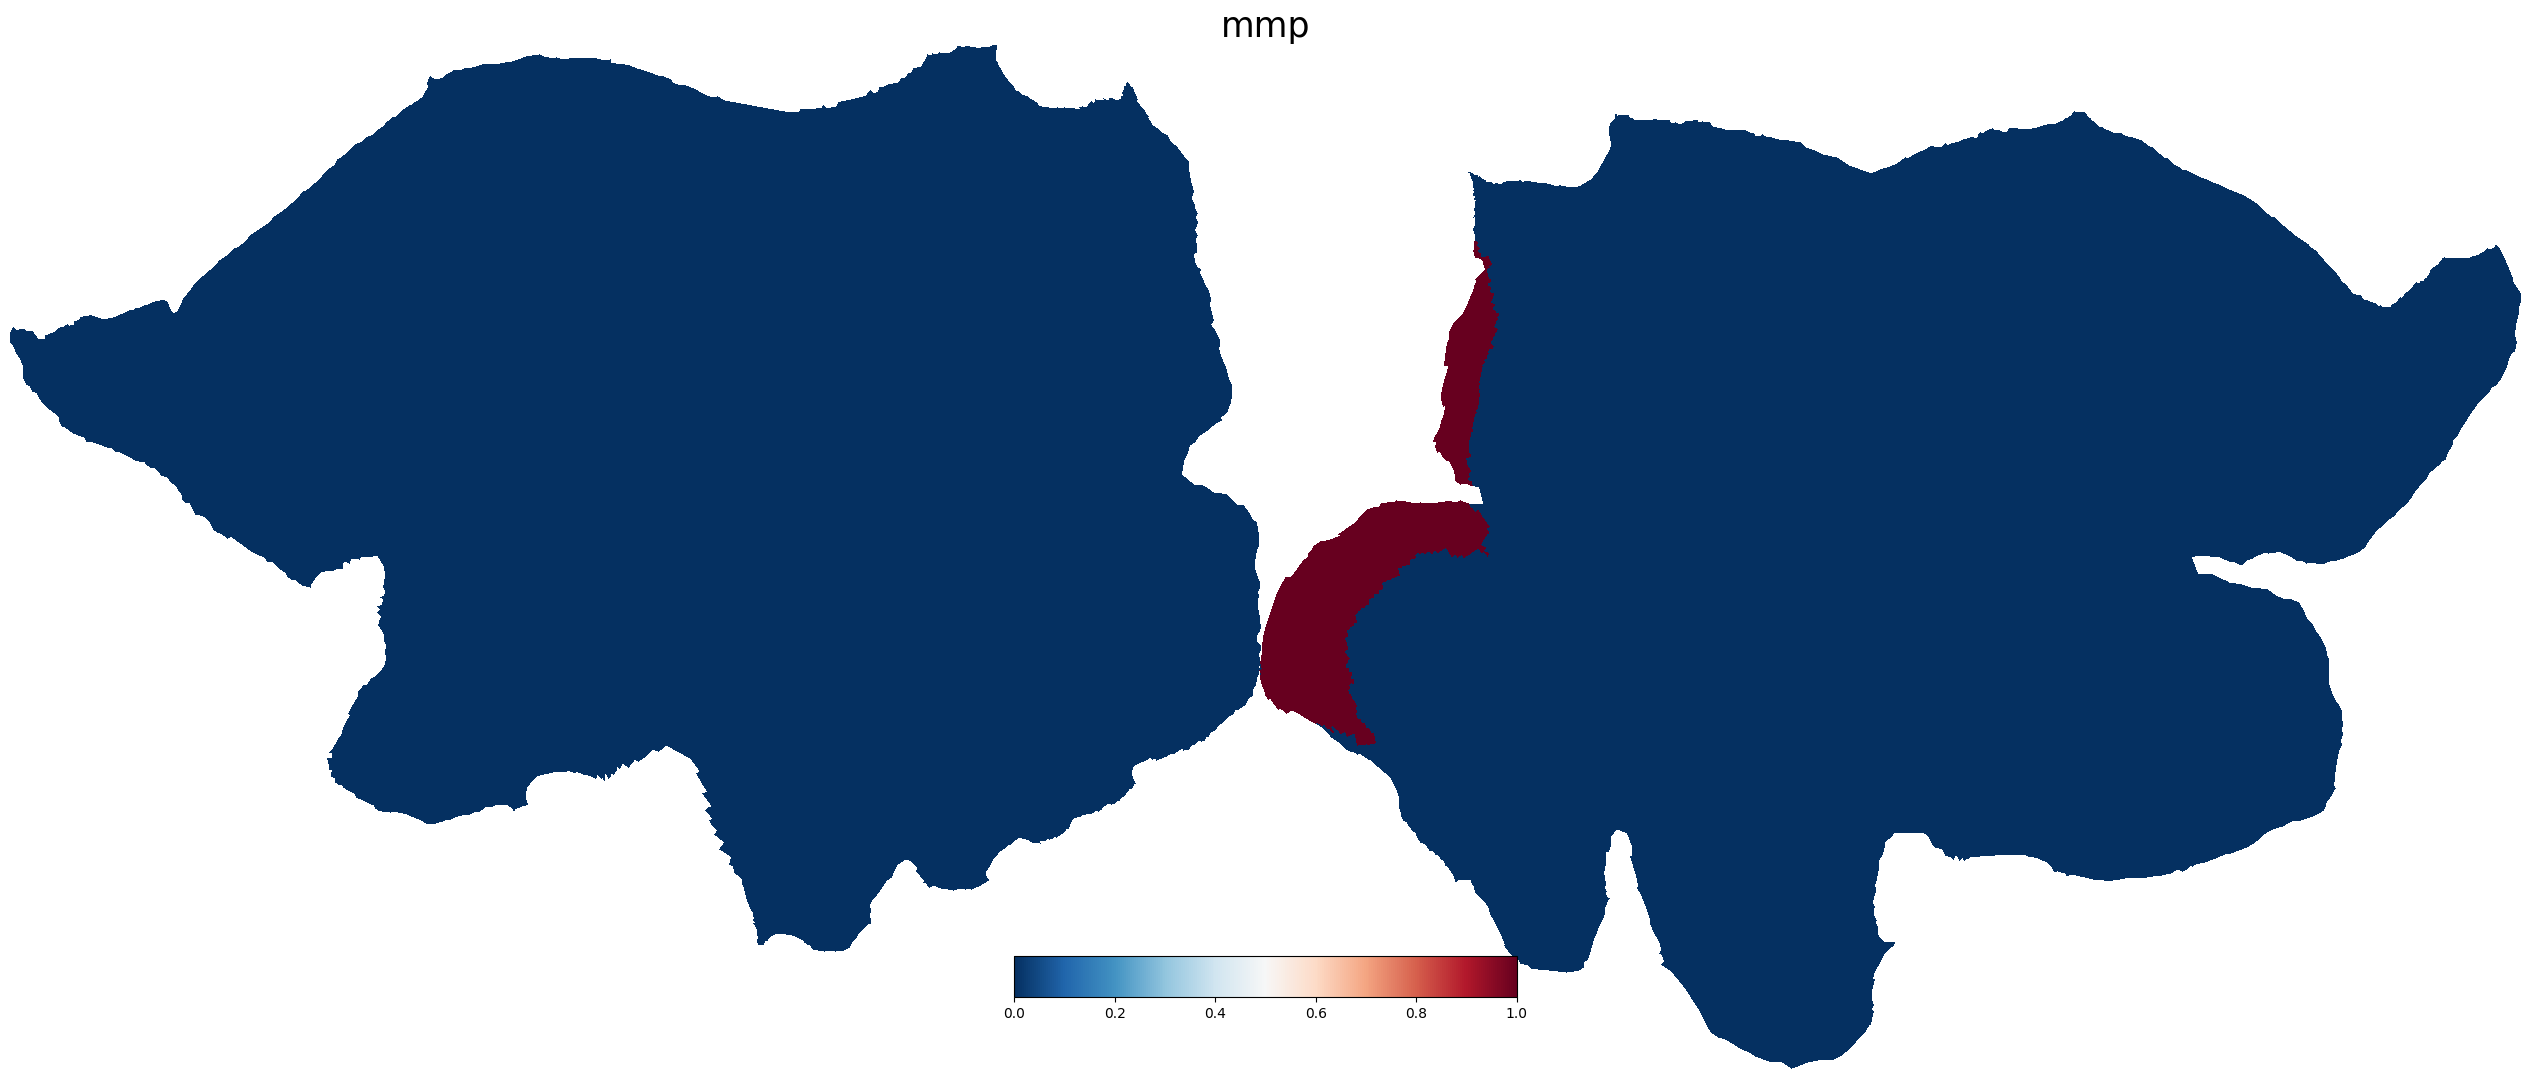

In [98]:
# plot mmp npz
vertex_data = cortex.Vertex(V1_b, pycortex_subject)

cortex.quickshow(vertex_data)
plt.title("mmp",fontsize=25)
# plt.savefig('/Users/uriel/Downloads/V1.pdf')
plt.show()

In [99]:
V1_b

array([0., 0., 0., ..., 0., 0., 0.])

In [92]:
cortex.utils.add_roi(   data = vertex_data,
                        name = 'V1',
                        open_inkscape = False,
                        add_path = True)

In [93]:
import cortex
from cortex.rois import *

In [ ]:
# create npz for V1

npz_fn = 

In [103]:

overlay_fn = 

rp = ROIpack('sub-170k',npz_fn)
rp.to_svg(filename=)
#will give a svg file in the /tmp directory

ROI file [0. 0. 0. ... 0. 0. 0.] doesn't exist..
Create new file: /var/folders/60/q71xm4hx45x3db5d6mzl8r4h0000gn/T/sub-170k-rois-zilcre7t.svg
